### 1. What is our independent variable? What is our dependent variable?


Independent Variable: wether color and name font are similar or not
    
Dependent Variable: Reaction time to answer.
        

### 2. What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.


\begin{equation*}
H_0: The\ null\ hypothesis\ states\ that\ reaction\ time\ for\ congruent\ and\ incongruent\ colors\ are\ the\ same.\\
H_A: The\ alternative\ hypothesis\ states\ that\ the\ reaction\ time\ for\ incongruent\ colors\ are\ larger\ than\ for\ congruent\ colors.\\
\mu_i:Average\ value\ of\ incongruent\ reaction\ time\\
\mu_c:Average\ value\ of\ congruent\ reaction\ time\\
H_0: \mu_i=\mu_c\\
H_A: \mu_i>\mu_c\\
\end{equation*}

I will opt for t-test as we don't know the population standard deviation and the sample size is below 30.

Dependent Means and paired t-test: Due to this assumptions, "Scores are normally distributed in the population; difference scores are normally distributed", "Samples or sets of data used to produce the difference scores are linked in the population through repeated measurement, natural association, or matching" and "Random sampling from a defined population"



### 3. Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.

In [113]:
import pandas as pd

path = '/Users/dgcagigas/Documents/DataAnalyzer/P1/stroopdata.csv'
dataFrame = pd.read_csv(path) #All data
dataFrame

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803
5,12.238,20.878
6,14.692,24.572
7,8.987,17.394
8,9.401,20.762
9,14.480,26.282


It's clear that the reaction time with incongruent colors is bigger than congruent. Now we'll calculate the central tendency values. Mean and median. Mode is irrelevant.
\begin{equation*}
Mean => \bar{x}=\sum x_i/n\\
Median => intermediate value(sorted)
\end{equation*}


In [114]:
Mean = dataFrame.mean();
#Mean
Mean


Congruent      14.051125
Incongruent    22.015917
dtype: float64

In [115]:
Median = dataFrame.median();
#Median
Median

Congruent      14.3565
Incongruent    21.0175
dtype: float64

\begin{equation*}
Variance => \sigma^2 = \sum (x_i-\bar{x})^2/n\\
Standard\ deviation => \sigma = \sqrt{\sum (x_i-\bar{x})^2/n}
\end{equation*}



In [116]:
Variance = dataFrame.var();
#Variance
Variance

Congruent      12.669029
Incongruent    23.011757
dtype: float64

In [117]:
SD = dataFrame.std();
#Standard deviation
SD

Congruent      3.559358
Incongruent    4.797057
dtype: float64

### 4. Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.


In [118]:
# Causes plots to display within the notebook rather than in a new window
%pylab inline

import matplotlib.pyplot as plt
import numpy as np

datas = np.genfromtxt(path,
                       delimiter=',',
                       dtype=np.float32)
data = datas[1:,:]


Populating the interactive namespace from numpy and matplotlib


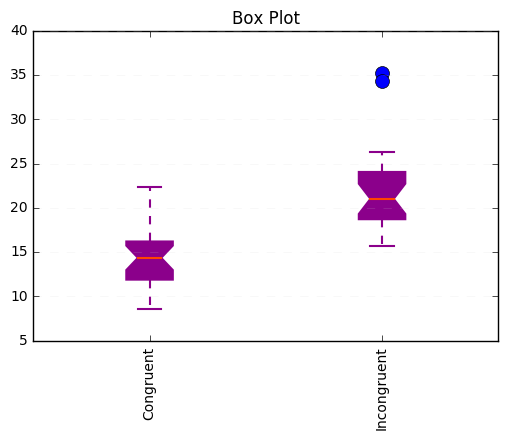

In [119]:
plt.figure()

box_colours = ['SkyBlue', 'LightGreen']

locations = [1, 2]

plt.figure()
plot2 = plt.boxplot(data, 
                    widths=0.2,
                    notch=True,             # adds median notch
                    positions=locations,    # boxes locations
                    patch_artist=True,
                    )
plt.grid(axis='y',          # set y-axis grid lines
        linestyle='--',     # use dashed lines
        which='major',      # only major ticks
        color='lightgrey',  # line colour
        alpha=0.2)          # make lines semi-translucent

for box, colour in zip(plot2['boxes'], box_colours):
    plt.setp(box, color='DarkMagenta', 
             linewidth=1.5, 
             facecolor=colour)
plt.setp(plot2['whiskers'], color='DarkMagenta', linewidth=1.5)
plt.setp(plot2['caps'], color='DarkMagenta', linewidth=1.5)
plt.setp(plot2['fliers'], color='OrangeRed', marker='o', markersize=10)
plt.setp(plot2['medians'], color='OrangeRed', linewidth=1.5)

names = ['Congruent', 'Incongruent']

plt.xticks(locations,               # tick marks
           names,                   # labels
           rotation='vertical')     # rotate the labels

plt.title('Box Plot')  # plot title
                    
plt.show()                          # render the plot



All participants took longer to answer incongruent data.

### 5. Now, perform the statistical test and report your results. What is your confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?


\begin{equation*}
H_o = Congruent\ and\ incongruent\ reaction\ times\ do\ not\ differ.\ \mu_c>=\mu_i\\
H_A = Congruent\ and\ incongruent\ reaction\ times\ do\ differ.\ \mu_c<\mu_i\\
\end{equation*}

We'll suppose a confidence level of 0.05.
We will conduct a one-tailed paired test, as the incongruent test will have larger reaction time as congruent.

Using the t-table, the t-critical value at an alpha level of 0.05 with df=23 t=1.714

We calculate the difference between the two tests.
\begin{equation*}
d=\mu_c-\mu_i
\end{equation*}


In [120]:
Dif=(dataFrame['Congruent']-dataFrame['Incongruent']);
d = Dif.mean()
d

-7.964791666666667

In [121]:
SDd = Dif.std();
#Standard deviation
SDd

4.864826910359056

And the new standard error will be
\begin{equation*}
SE = \frac{SD} {\sqrt{n}}
\end{equation*}


In [122]:
n=24;
SE = SDd/sqrt(n)
SE

0.99302863477834058

\begin{equation*}
T=\frac{\bar{d}}{S_D/\sqrt{n}}
\end{equation*}

In [123]:
T=d/SE;
T

-8.020706944109957

Using the tables of the t-distribution, we get a critical value of -1.7138 for a 0.05 of probability. It is clear that our t-statistic is far bigger, so we can reject null Hypothesis.
Concerning the t statistic value, incongruent test is very unlikely(probability circa 0) to get a mean result as in congruent test. So as I expected font color is more important at a first sight than the words.

### 6. Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

It's easier for our brain to process colors that words.
I guess that you can cheat your brain in the same way listening the word instead of reading.